In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [155]:
Data = pd.read_csv(r"C:\Users\SHIVA KUMAR\Downloads\Regrerssion_energy_production_data (1).csv")
Data

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58
...,...,...,...,...,...
9563,17.10,49.69,1005.53,81.82,457.32
9564,24.73,65.34,1015.42,52.80,446.92
9565,30.44,56.24,1005.19,56.24,429.34
9566,23.00,66.05,1020.61,80.29,421.57


In [156]:
Data.columns

Index(['temperature', 'exhaust_vacuum', 'amb_pressure', 'r_humidity',
       'energy_production'],
      dtype='object')

In [157]:

Data[Data.duplicated()].shape


(41, 5)

In [158]:
duplicates = Data[Data.duplicated()]
duplicates

#It does seem like there are similarities between these data points,
#but they're not exact duplicates across all columns. There might be a few
#columns that are identical while others have varying values.

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
2066,10.72,41.17,1019.68,60.71,479.21
2780,28.41,75.60,1018.48,56.07,440.28
3333,24.79,75.60,1017.07,68.23,440.05
3467,7.64,41.17,1020.01,75.14,488.53
3550,25.42,75.60,1017.39,77.63,438.24
3747,11.61,41.17,1019.57,58.82,476.81
4292,12.27,41.17,1019.41,58.10,475.13
4528,24.63,59.57,1010.45,85.36,440.67
5065,8.57,41.17,1020.18,72.47,484.20
5564,11.82,41.17,1019.50,55.74,475.61


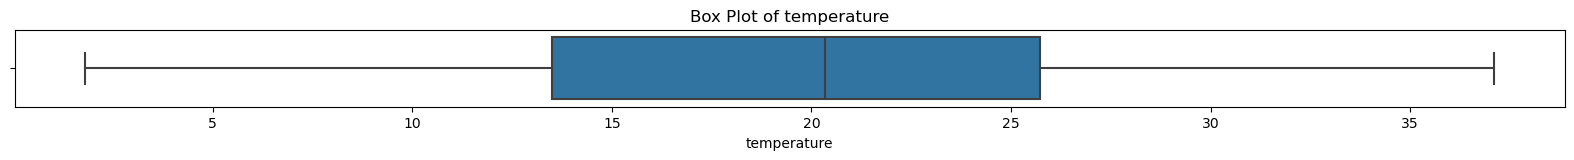

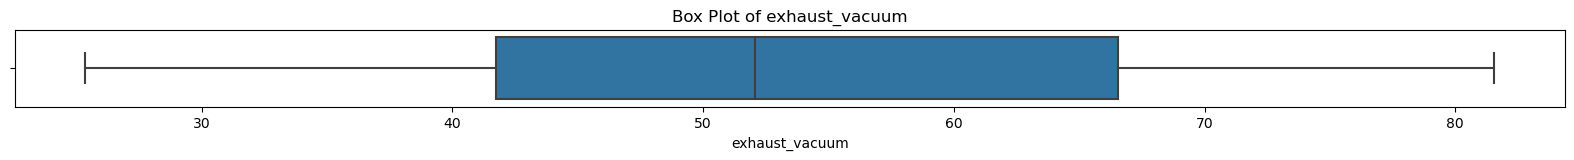

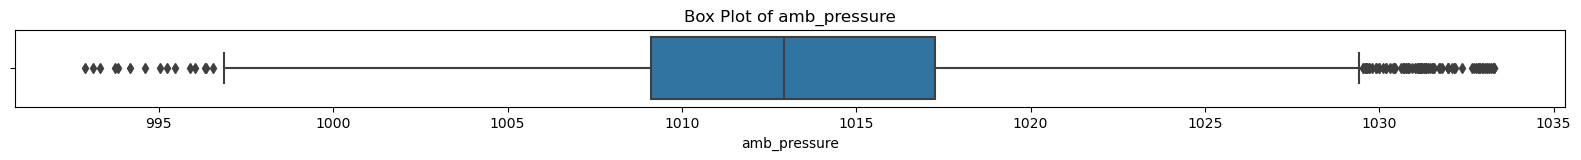

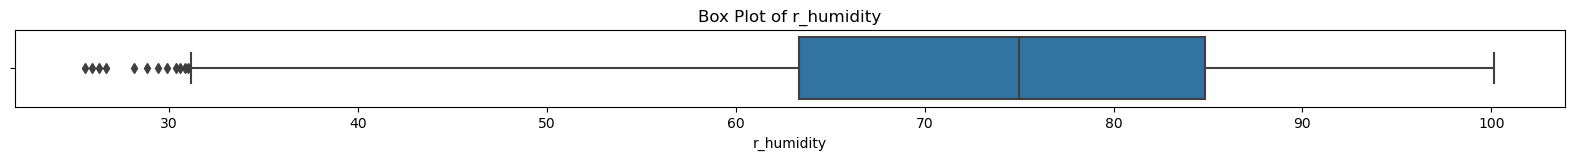

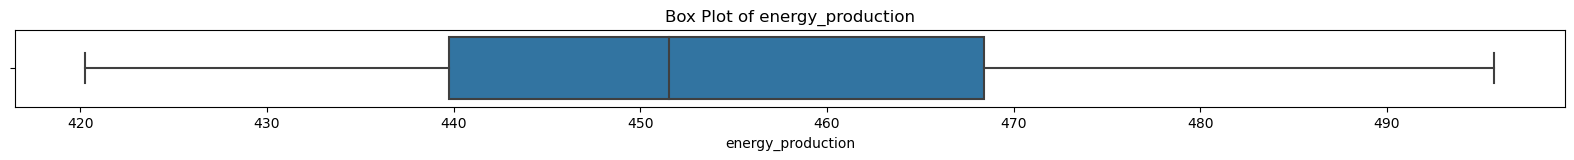

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming Salary_test is your DataFrame
columns_of_interest = [0,1,2,3,4]  # Adjust column indices as needed

for column in columns_of_interest:
    plt.figure(figsize=(20, 1))
    sns.boxplot(x=Data.iloc[:, column])
    plt.title(f"Box Plot of {Data.columns[column]}")
    plt.show()


In [160]:
Data.corr()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
temperature,1.000000,0.844107,-0.507549,-0.542535,-0.948128
exhaust_vacuum,0.844107,1.000000,-0.413502,-0.312187,-0.869780
amb_pressure,-0.507549,-0.413502,1.000000,0.099574,0.518429
r_humidity,-0.542535,-0.312187,0.099574,1.000000,0.389794
energy_production,-0.948128,-0.869780,0.518429,0.389794,1.000000


# Preparing Model Building part

In [161]:
import statsmodels.formula.api as smf
model_1 = smf.ols("energy_production~temperature+exhaust_vacuum +amb_pressure +r_humidity",data=Data).fit()
print("dependent *energy_production* value r2:-  ",model_1.rsquared)
print("                                r2_Adj:-  ",model_1.rsquared_adj)
print("                                  AIC :-  ",model_1.aic)


dependent *energy_production* value r2:-   0.9286960898122536
                                r2_Adj:-   0.9286662648994908
                                  AIC :-   56186.22904743758


In [162]:
import statsmodels.formula.api as smf
model_2 = smf.ols("temperature~energy_production+exhaust_vacuum+amb_pressure +r_humidity",data=Data).fit()
print("dependent *temperature* value     r2:-  ",model_2.rsquared)
print("                              r2_Adj:-  ",model_2.rsquared_adj)
print("                                AIC :-  ",model_2.aic)


dependent *temperature* value     r2:-   0.9391532162095222
                              r2_Adj:-   0.9391277652908605
                                AIC :-   38812.7191548253


In [163]:
import statsmodels.formula.api as smf
model_3 = smf.ols("exhaust_vacuum~energy_production+temperature+amb_pressure +r_humidity",data=Data).fit()
print("dependent *exhaust_vacuum* value  r2:-  ",model_3.rsquared)
print("                              r2_Adj:-  ",model_3.rsquared_adj)
print("                                AIC :-  ",model_3.aic)


dependent *exhaust_vacuum* value  r2:-   0.77108563001965
                              r2_Adj:-   0.7709898799956072
                                AIC :-   61702.663905350535


In [164]:
import statsmodels.formula.api as smf
model_4 = smf.ols("amb_pressure~energy_production+temperature+exhaust_vacuum +r_humidity",data=Data).fit()
print("dependent *amb_pressure* value    r2:-  ",model_4.rsquared)
print("                              r2_Adj:-  ",model_4.rsquared_adj)
print("                                AIC :-  ",model_4.aic)


dependent *amb_pressure* value    r2:-   0.31468567391483604
                              r2_Adj:-   0.31439902147267984
                                AIC :-   57637.14134128751


In [165]:
import statsmodels.formula.api as smf
model_5 = smf.ols("r_humidity~energy_production+temperature+exhaust_vacuum +amb_pressure",data=Data).fit()
print("dependent *r_humidity* value      r2:-  ",model_5.rsquared)
print("                              r2_Adj:-  ",model_5.rsquared_adj)
print("                                AIC :-  ",model_5.aic)


dependent *r_humidity* value      r2:-   0.4902335905977163
                              r2_Adj:-   0.49002036612447475
                                AIC :-   72019.24391241511


# Simple Linear Regresions Models to check series of variables with Dependent

In [166]:
import statsmodels.formula.api as smf
SLR_model_1 = smf.ols("energy_production~temperature",data=Data).fit()
print("dependent *E_P with temp*     value r2:-  ",SLR_model_1.rsquared)
print("                                r2_Adj:-  ",SLR_model_1.rsquared_adj)
print("                                  AIC :-  ",SLR_model_1.aic)


dependent *E_P with temp*     value r2:-   0.8989475964148236
                                r2_Adj:-   0.898937032709661
                                  AIC :-   59516.47642852955


In [167]:
import statsmodels.formula.api as smf
SLR_model_2 = smf.ols("energy_production~exhaust_vacuum",data=Data).fit()
print("dependent *E_P with Exhaust_* value r2:-  ",SLR_model_2.rsquared)
print("                                r2_Adj:-  ",SLR_model_2.rsquared_adj)
print("                                  AIC :-  ",SLR_model_2.aic)

dependent *E_P with Exhaust_* value r2:-   0.756517787068398
                                r2_Adj:-   0.7564923341922813
                                  AIC :-   67930.62024106368


In [168]:
import statsmodels.formula.api as smf
SLR_model_3 = smf.ols("energy_production~amb_pressure",data=Data).fit()
print("dependent *E_P with Amb_pres* value r2:-  ",SLR_model_3.rsquared)
print("                                r2_Adj:-  ",SLR_model_3.rsquared_adj)
print("                                  AIC :-  ",SLR_model_3.aic)

dependent *E_P with Amb_pres* value r2:-   0.2687686564110674
                                r2_Adj:-   0.2686922157521098
                                  AIC :-   78452.41582050038


In [169]:
import statsmodels.formula.api as smf
SLR_model_4 = smf.ols("energy_production~r_humidity",data=Data).fit()
print("dependent *E_P with r_humidi* value r2:-  ",SLR_model_4.rsquared)
print("                                r2_Adj:-  ",SLR_model_4.rsquared_adj)
print("                                  AIC :-  ",SLR_model_4.aic)

dependent *E_P with r_humidi* value r2:-   0.151939440231176
                                r2_Adj:-   0.15185078660795115
                                  AIC :-   79870.60547497339


# SLR checking with individual of independent variables 

In [170]:
import statsmodels.formula.api as smf
IND_model_1 = smf.ols("temperature~r_humidity",data=Data).fit()
print("dependent *temp with r_humid* value r2:-  ",IND_model_1.rsquared)
print("                                r2_Adj:-  ",IND_model_1.rsquared_adj)
print("                                  AIC :-  ",IND_model_1.aic)

dependent *temp with r_humid* value r2:-   0.2943438487341071
                                r2_Adj:-   0.2942700816265109
                                  AIC :-   62255.67807264377


In [171]:
import statsmodels.formula.api as smf
IND_model_2 = smf.ols("temperature~amb_pressure",data=Data).fit()
print("dependent *temp with amb_pre* value r2:-  ",IND_model_2.rsquared)
print("                                r2_Adj:-  ",IND_model_2.rsquared_adj)
print("                                  AIC :-  ",IND_model_2.aic)

dependent *temp with amb_pre* value r2:-   0.2576063316162883
                                r2_Adj:-   0.25752872408248284
                                  AIC :-   62741.26911232347


# SLR checking with individual of one dependent and with other indipendent variables 

In [172]:
#trying by removing variables of exhaust_vacuum, amb_pressure +r_humidity 
import statsmodels.formula.api as smf
MLR_model_1 = smf.ols("energy_production~temperature",data=Data).fit() 
print("dependent *E_P with tempera * value r2:-  ",MLR_model_1.rsquared)
print("                                r2_Adj:-  ",MLR_model_1.rsquared_adj)
print("                                  AIC :-  ",MLR_model_1.aic)


dependent *E_P with tempera * value r2:-   0.8989475964148236
                                r2_Adj:-   0.898937032709661
                                  AIC :-   59516.47642852955


In [173]:
#trying by removing  variables of amb_pressure, r_humidity
MLR_model_2 = smf.ols("energy_production~temperature+exhaust_vacuum",data=Data).fit()
print("dependent *E_P with temp,exhaus* value r2:-  ",MLR_model_2.rsquared)
print("                                   r2_Adj:-  ",MLR_model_2.rsquared_adj)
print("                                     AIC :-  ",MLR_model_2.aic)

dependent *E_P with temp,exhaus* value r2:-   0.9157294412114197
                                   r2_Adj:-   0.9157118206032047
                                     AIC :-   57780.86381981589


In [174]:
 #trying by removing  variable of r_humidity
MLR_model_3 = smf.ols("energy_production~temperature+exhaust_vacuum +amb_pressure",data=Data).fit()
print("dependent *E_P with temp,exhaus,amb* value r2:-  ",MLR_model_3.rsquared)
print("                                       r2_Adj:-  ",MLR_model_3.rsquared_adj)
print("                                         AIC :-  ",MLR_model_3.aic)

dependent *E_P with temp,exhaus,amb* value r2:-   0.9179754458602665
                                       r2_Adj:-   0.9179497167027572
                                         AIC :-   57524.39465694349


In [175]:
#trying by removing variables of amb_pressure 

MLR_model_4 = smf.ols("energy_production~temperature+exhaust_vacuum+r_humidity",data=Data).fit()
print("dependent *E_P with temp,exhas,r_humi* value r2:-  ",MLR_model_4.rsquared)
print("                                         r2_Adj:-  ",MLR_model_4.rsquared_adj)
print("                                           AIC :-  ",MLR_model_4.aic)

dependent *E_P with temp,exhas,r_humi* value r2:-   0.9283748216583019
                                         r2_Adj:-   0.9283523545383704
                                           AIC :-   56227.241969516006


In [176]:
#trying by removing variables of exhaust_vacuum, r_humidity 

MLR_model_5 = smf.ols("energy_production~temperature+amb_pressure",data=Data).fit()
print("dependent *E_P with temp,amb* value r2:-  ",MLR_model_5.rsquared)
print("                                r2_Adj:-  ",MLR_model_5.rsquared_adj)
print("                                  AIC :-  ",MLR_model_5.aic)

dependent *E_P with temp,amb* value r2:-   0.9008123274074772
                                r2_Adj:-   0.9007915876954871
                                  AIC :-   59340.267727616854


<Axes: xlabel='energy_production', ylabel='temperature'>

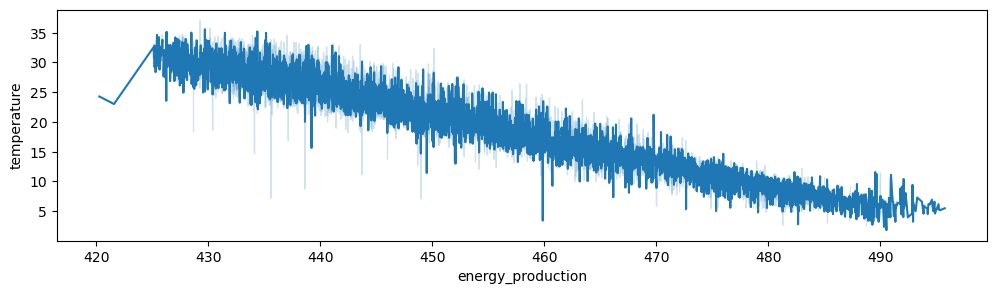

In [177]:
plt.figure(figsize=(12,3))
sns.lineplot(x="energy_production",y='temperature',data=Data)

In [178]:
df_num = Data.iloc[:,[0,1,2,3,4]]
df_num

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58
...,...,...,...,...,...
9563,17.10,49.69,1005.53,81.82,457.32
9564,24.73,65.34,1015.42,52.80,446.92
9565,30.44,56.24,1005.19,56.24,429.34
9566,23.00,66.05,1020.61,80.29,421.57


In [179]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X1 = SS.fit_transform(df_num)

In [180]:
X1= pd.DataFrame(X1)
X1.columns=list(df_num)
X1

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,-1.350123,-1.239122,0.631631,-0.904755,1.578274
1,-1.021356,-0.941653,1.087977,1.463133,0.644259
2,-0.775787,-0.726028,1.879426,0.574062,0.651290
3,-0.795916,-0.000457,0.779817,0.395289,0.743286
4,-0.605365,-0.367177,1.771654,0.115827,0.539959
...,...,...,...,...,...
9563,-0.342351,-0.363242,-1.301526,0.582966,0.173150
9564,0.681523,0.868340,0.363885,-1.404772,-0.436245
9565,1.447752,0.152212,-1.358780,-1.169148,-1.466358
9566,0.449373,0.924214,1.237847,0.478168,-1.921646


In [181]:
df = X1.copy()

In [182]:

# Features (X) and target variable (y)
X = df.iloc[:,0:4]
y = df["energy_production"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape,X_test.shape

((7654, 4), (1914, 4))

# Support vector Regressor model building

SVR with linear kernel

In [183]:
from sklearn.svm import SVR

# Initialize the SVM model
svm_model = SVR(kernel='linear') 

# Train the SVM model
svm_model.fit(X_train, y_train)


SVR(kernel='linear')

In [184]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
predictions = svm_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse.round(3)}")
print(f"R-squared Score: {r2.round(3)}")


Mean Squared Error: 0.072
R-squared Score: 0.931


In [185]:
import plotly.graph_objects as go

y_pred = svm_model.predict(X_test)


fig = go.Figure()
fig.add_trace(go.Scatter(x=y_test, y=y_pred, mode='markers',
                         marker=dict(color='blue'),
                         name='Predicted Energy Production vs. Actual Energy Production'))
fig.add_trace(go.Scatter(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)],
                         mode='lines',
                         marker=dict(color='red'),
                         name='Ideal Prediction'))
fig.update_layout(
    title='Predicted Energy Production vs.Actual Energy Production',
    xaxis_title='Actual Energy Production',
    yaxis_title='Predicted Energy Production'
)
fig.show()


SVR with Radial Basis Function (RBF) Kernel

In [186]:
from sklearn.svm import SVR

# Initialize the SVM model
svm_model_2 = SVR(kernel='rbf')
# Train the SVM model
svm_model_2.fit(X_train, y_train)

SVR()

In [187]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
predictions_2 = svm_model_2.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions_2)
r2 = r2_score(y_test, predictions_2)

print(f"Mean Squared Error: {mse.round(3)}")
print(f"R-squared Score: {r2.round(3)}")


Mean Squared Error: 0.057
R-squared Score: 0.945


In [188]:
import plotly.graph_objects as go

y_pred = svm_model_2.predict(X_test)


fig = go.Figure()
fig.add_trace(go.Scatter(x=y_test, y=y_pred, mode='markers',
                         marker=dict(color='blue'),
                         name='Predicted Energy Production vs. Actual Energy Production'))
fig.add_trace(go.Scatter(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)],
                         mode='lines',
                         marker=dict(color='red'),
                         name='Ideal Prediction'))
fig.update_layout(
    title='Predicted Energy Production vs.Actual Energy Production',
    xaxis_title='Actual Energy Production',
    yaxis_title='Predicted Energy Production'
)
fig.show()


SVR with Polynomial Kernel

In [189]:
from sklearn.svm import SVR

# Initialize the SVM model
svm_model_3 = SVR(kernel='poly')  
# Train the SVM model
svm_model_3.fit(X_train, y_train)

# Make predictions on test data
predictions_3 = svm_model_3.predict(X_test)


In [190]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
predictions_3 = svm_model_3.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions_3)
r2 = r2_score(y_test, predictions_3)

print(f"Mean Squared Error: {mse.round(3)}")
print(f"R-squared Score: {r2.round(3)}")


Mean Squared Error: 0.223
R-squared Score: 0.786


In [191]:
import plotly.graph_objects as go

y_pred = svm_model_3.predict(X_test)


fig = go.Figure()
fig.add_trace(go.Scatter(x=y_test, y=y_pred, mode='markers',
                         marker=dict(color='blue'),
                         name='Predicted Energy Production vs. Actual Energy Production'))
fig.add_trace(go.Scatter(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)],
                         mode='lines',
                         marker=dict(color='red'),
                         name='Ideal Prediction'))
fig.update_layout(
    title='Predicted Energy Production vs. Actual Energy Production',
    xaxis_title='Actual Energy Production',
    yaxis_title='Predicted Energy Production'
)
fig.show()


Sigmoid Kernel: This kernel is based on hyperbolic tangent functions and can map data into higher dimensions. 
                It's less commonly used compared to others.
            As per our data we don't see the pattern of hyperbolic tangent in the data distribution so we are not going to perform the Sigmoid Kernel.

# Random Forest regressor 

In [192]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust parameters as needed

# Train the model
random_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [193]:
# Make predictions on the test set
predictions = random_forest.predict(X_test)

# Calculate Mean Squared Error (MSE) and R-squared score
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error (MSE): 0.03858817759885501
R-squared Score: 0.9629558585236617


In [194]:
import plotly.graph_objects as go

y_pred = random_forest.predict(X_test)


fig = go.Figure()
fig.add_trace(go.Scatter(x=y_test, y=y_pred, mode='markers',
                         marker=dict(color='blue'),
                         name='Predicted Energy Production vs. Actual Energy Production'))
fig.add_trace(go.Scatter(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)],
                         mode='lines',
                         marker=dict(color='red'),
                         name='Ideal Prediction'))
fig.update_layout(
    title='Predicted Energy Production vs. Actual Energy Production',
    xaxis_title='Actual Energy Production',
    yaxis_title='Predicted Energy Production'
)
fig.show()


Trying with the Estimaters in Random forest regressor

In [216]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Random Forest with different parameters
params = [
    {'n_estimators': 50, 'max_depth': 5, 'random_state': 42},
    {'n_estimators': 100, 'max_depth': 10, 'random_state': 42},
    {'n_estimators': 150, 'max_depth': None, 'random_state': 42},
]

for i, param_set in enumerate(params):
    
    random_forest = RandomForestRegressor(**param_set)

    random_forest.fit(X_train, y_train)

    predictions = random_forest.predict(X_test)

    # Calculate Mean Squared Error (MSE) and R-squared score
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    print(f"Random Forest Model {i+1} - Mean Squared Error (MSE): {mse.round(3)}")
    print(f"Random Forest Model {i+1} - R-squared Score: {r2.round(3)}")

Random Forest Model 1 - Mean Squared Error (MSE): 0.062
Random Forest Model 1 - R-squared Score: 0.94
Random Forest Model 2 - Mean Squared Error (MSE): 0.043
Random Forest Model 2 - R-squared Score: 0.958
Random Forest Model 3 - Mean Squared Error (MSE): 0.038
Random Forest Model 3 - R-squared Score: 0.963


GridSearchCV with cross validation

In [217]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define the parameter grid to search through
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, None],
    'random_state': [42]
}

# Initialize Random Forest Regressor
random_forest = RandomForestRegressor()

# Perform GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions using the best model
predictions = best_model.predict(X_test)

# Calculate Mean Squared Error (MSE) and R-squared score
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Best Parameters: {best_params}")
print(f"Best Model - Mean Squared Error (MSE): {mse.round(3)}")
print(f"Best Model - R-squared Score: {r2.round(3)}")


Best Parameters: {'max_depth': None, 'n_estimators': 150, 'random_state': 42}
Best Model - Mean Squared Error (MSE): 0.038
Best Model - R-squared Score: 0.963


In [221]:
import plotly.graph_objects as go

y_pred = grid_search.predict(X_test)


fig = go.Figure()
fig.add_trace(go.Scatter(x=y_test, y=y_pred, mode='markers',
                         marker=dict(color='blue'),
                         name='Predicted Energy Production vs. Actual Energy Production'))
fig.add_trace(go.Scatter(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)],
                         mode='lines',
                         marker=dict(color='red'),
                         name='Ideal Prediction'))
fig.update_layout(
    title='Predicted Energy Production vs. Actual Energy Production ',
    xaxis_title='Actual Energy Production',
    yaxis_title='Predicted Energy Production'
)
fig.show()


# Decision Tree Regressor 

In [195]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Train a linear regression model
model1 = DecisionTreeRegressor(random_state=42)
model1.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [196]:
y_pred = model1.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 0.0649030995229236
R-squared Score: 0.9376938805979949


In [197]:
import plotly.graph_objects as go

y_pred = model1.predict(X_test)


fig = go.Figure()
fig.add_trace(go.Scatter(x=y_test, y=y_pred, mode='markers',
                         marker=dict(color='blue'),
                         name='Predicted Energy Production vs. Actual Energy Production'))
fig.add_trace(go.Scatter(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)],
                         mode='lines',
                         marker=dict(color='red'),
                         name='Ideal Prediction'))
fig.update_layout(
    title='Predicted Energy Production vs. Actual Energy Production',
    xaxis_title='Actual Energy Production',
    yaxis_title='Predicted Energy Production'
)
fig.show()


# K-Nearest Neighbors (KNN) Regressor 

In [198]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

knn_regressor = KNeighborsRegressor(n_neighbors=4) 

# Train the KNN Regressor
knn_regressor.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=4)

In [199]:

# Make predictions on the test set
y_pred = knn_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse.round(3)}")
print(f"R-squared Score: {r2.round(3)}")

Mean Squared Error (MSE): 0.051
R-squared Score: 0.951


In [200]:
import plotly.graph_objects as go

y_pred = knn_regressor.predict(X_test)


fig = go.Figure()
fig.add_trace(go.Scatter(x=y_test, y=y_pred, mode='markers',
                         marker=dict(color='blue'),
                         name='Predicted Energy Production vs. Actual Energy Production'))
fig.add_trace(go.Scatter(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)],
                         mode='lines',
                         marker=dict(color='red'),
                         name='Ideal Prediction'))
fig.update_layout(
    title='Predicted Energy Production vs. Actual Energy Production',
    xaxis_title='Actual Energy Production',
    yaxis_title='Predicted Energy Production'
)
fig.show()


# Boosting Techniques 

Gradient Boosting Regressor

In [201]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize Gradient Boosting Regressor
gradient_boosting = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
gradient_boosting.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

In [202]:

predictions = gradient_boosting.predict(X_test)

# Calculate Mean Squared Error (MSE) and R-squared score
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Gradient Boosting - Mean Squared Error (MSE): {mse.round(3)}")
print(f"Gradient Boosting - R-squared Score: {r2.round(3)}")


Gradient Boosting - Mean Squared Error (MSE): 0.053
Gradient Boosting - R-squared Score: 0.949


In [203]:
import plotly.graph_objects as go

y_pred = gradient_boosting.predict(X_test)


fig = go.Figure()
fig.add_trace(go.Scatter(x=y_test, y=y_pred, mode='markers',
                         marker=dict(color='blue'),
                         name='Predicted Energy Production vs. Actual Energy Production'))
fig.add_trace(go.Scatter(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)],
                         mode='lines',
                         marker=dict(color='red'),
                         name='Ideal Prediction'))
fig.update_layout(
    title='Predicted Energy Production vs. Actual Energy Production ',
    xaxis_title='Actual Energy Production',
    yaxis_title='Predicted Energy Production'
)
fig.show()


AdaBoost Regressor model

In [204]:
from sklearn.ensemble import AdaBoostRegressor

# Initialize AdaBoost Regressor
adaboost = AdaBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
adaboost.fit(X_train, y_train)


AdaBoostRegressor(learning_rate=0.1, n_estimators=100, random_state=42)

In [205]:
# Make predictions
predictions = adaboost.predict(X_test)

# Calculate Mean Squared Error (MSE) and R-squared score
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"AdaBoost - Mean Squared Error (MSE): {mse.round(3)}")
print(f"AdaBoost - R-squared Score: {r2.round(3)}")


AdaBoost - Mean Squared Error (MSE): 0.089
AdaBoost - R-squared Score: 0.915


In [206]:
import plotly.graph_objects as go

y_pred = adaboost.predict(X_test)


fig = go.Figure()
fig.add_trace(go.Scatter(x=y_test, y=y_pred, mode='markers',
                         marker=dict(color='blue'),
                         name='Predicted Energy Production vs. Actual Energy Production'))
fig.add_trace(go.Scatter(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)],
                         mode='lines',
                         marker=dict(color='red'),
                         name='Ideal Prediction'))
fig.update_layout(
    title='Predicted Energy Production vs. Actual Energy Production ',
    xaxis_title='Actual Energy Production',
    yaxis_title='Predicted Energy Production'
)
fig.show()


XGB Regressor model

In [207]:
from xgboost import XGBRegressor

# Initialize XGBoost Regressor
xgboost = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
xgboost.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [208]:
# Make predictions and evaluate the model
predictions = xgboost.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error (MSE): 0.0885542023932731
R-squared Score: 0.9149891338253291


In [209]:
import plotly.graph_objects as go

y_pred = xgboost.predict(X_test)


fig = go.Figure()
fig.add_trace(go.Scatter(x=y_test, y=y_pred, mode='markers',
                         marker=dict(color='blue'),
                         name='Predicted Energy Production vs. Actual Energy Production'))
fig.add_trace(go.Scatter(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)],
                         mode='lines',
                         marker=dict(color='red'),
                         name='Ideal Prediction'))
fig.update_layout(
    title='Predicted Energy Production vs. Actual Energy Production ',
    xaxis_title='Actual Energy Production',
    yaxis_title='Predicted Energy Production'
)
fig.show()
